# 결정트리
결정 트리 모델은 머신러닝에서 분류(Classification)와 회귀(Regression) 문제 모두에 사용될 수 있는 강력하고 직관적인 알고리즘입니다. 데이터의 특징(Feature)들을 기반으로 스무고개처럼 질문을 던져가며 데이터를 분류하거나 값을 예측하는 모델입니다. 나무(Tree) 구조로 표현되기 때문에 모델의 예측 과정을 이해하기 쉽다는 큰 장점이 있습니다.

In [6]:
# 결정트리 : 질문하는 형식 학습 = 연산을 안한다 = 데이터표준화 필요없음
# 예측 설명력을 가짐 (데이터에 설명력을 줄 수 있다.   ex.설탕이 얼마고 알콜이 몇그램이면 레드와인이다)
# 모델들 중에서 가장 성능이 좋다 (경진대회에서 입상한 85% 정도는 다 트리기반모델을 쓴거임)

import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


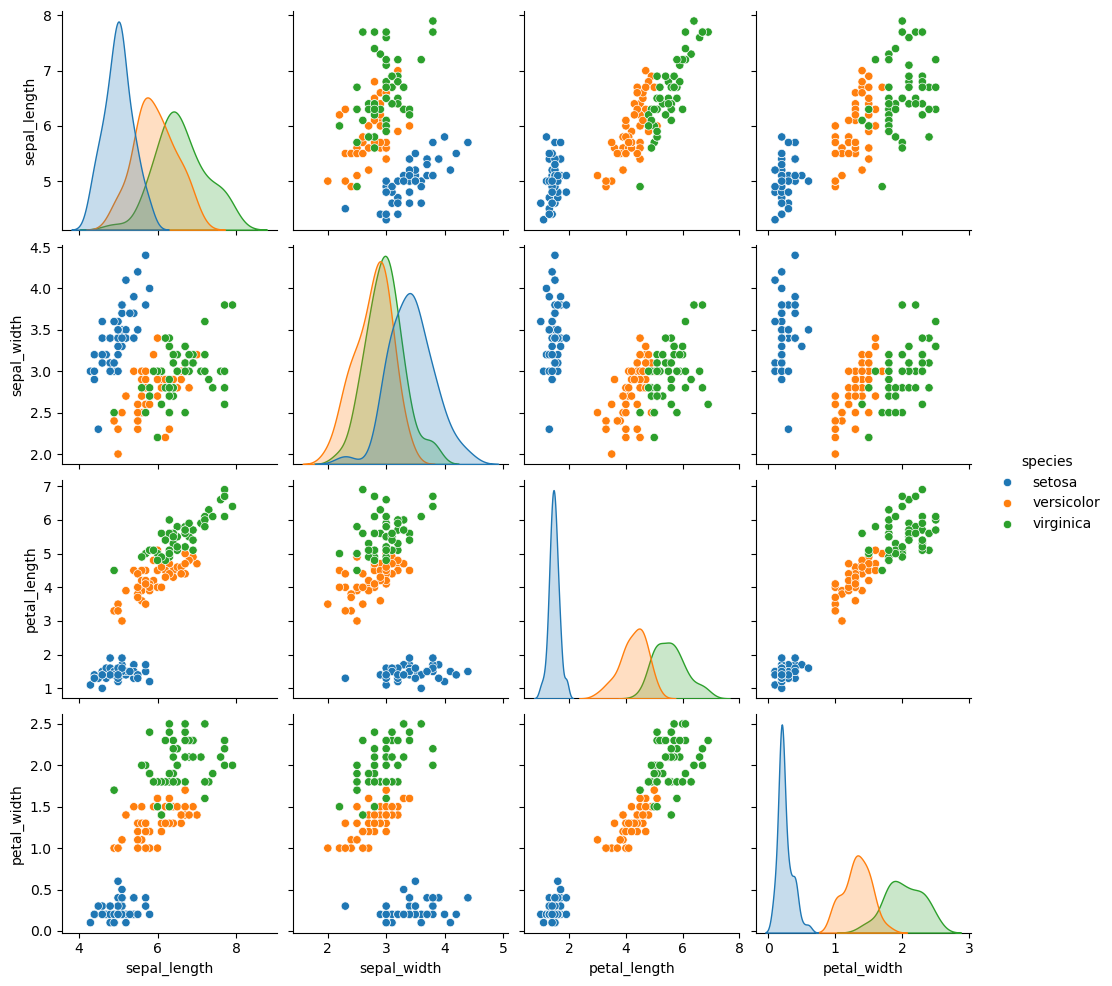

In [7]:
import seaborn as sns
sns.pairplot(iris, hue = "species")

In [5]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# iris["species"] = encoder.fit_transform(iris['species'])
# iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
X = iris.drop("species", axis = 1)
Y = iris['species']

In [9]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier()
model.fit(train_x, train_y)      # 표준화안하고 모델 그 자체로 학습하면 됨

print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

# 결정트리 = 데이터 가져와서 분할하고 학습하면 끝

1.0
0.9473684210526315


In [13]:
# 분류모델이니 정밀도도 확인해보면

from sklearn.metrics import classification_report
pred = model.predict(test_x)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.90      0.90      0.90        10
   virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



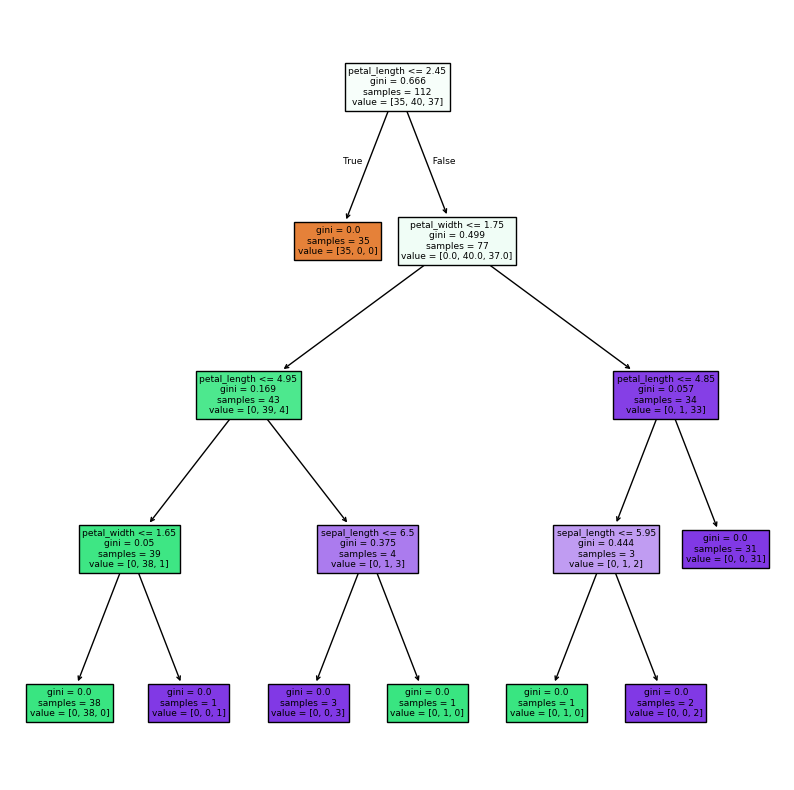

In [15]:
# plot tree로 결정트리가 어떻게 학습했는지를 시각화 가능
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plot_tree(model, filled=True, feature_names=iris.columns[:-1])
plt.show()

                                            # 각각 35,40,37개 들어잇엇는데 petal length가 2.45보다 작으면 왼쪽 가게하고 아니면 오른쪽 
                             # 첫번째거만 남앗다는 점에서 petal length가 2.45보다 작으면 첫번째거에 속한다는 설명력 얻을 수 있음 
# 데이터분할하면서 학습하기때문에 표준화 필요없음

## 지니 불순도
지니 불순도는 결정 트리에서 특정 노드(데이터 그룹)에 다른 종류의 데이터가 얼마나 섞여 있는지를 측정하는 지표입니다. 값이 낮을수록 해당 노드가 순수하다(즉, 대부분 같은 종류의 데이터로 이루어져 있다)는 의미입니다. 결정 트리는 데이터를 분할할 때 이 지니 불순도를 가장 많이 낮추는 방향으로 기준을 선택합니다.

* 최솟값 = 0: 노드가 완벽하게 순수함 (모든 데이터가 같은 클래스)
* 최댓값 = 0.5 (클래스가 2개일 경우): 클래스가 정확히 반반씩 섞여 있음

Gini = 1 - Σ (각 클래스의 비율)²

In [19]:
from collections import Counter

#box = ['Apple', 'Orange', 'Orange', 'Apple', 'Orange', 'Apple']
box = ['Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple']
total_length = len(box)
total_length

6

In [20]:
counts = Counter(box)
counts

Counter({'Apple': 6})

In [22]:
total_sum = 0
for i in counts:
    A = counts[i]/total_length
    total_sum += A ** 2

1 - total_sum
# 0.5의 제곱인 0.25가 2번 => 1 - 0.5 = 0.5
# 1의 제곱인 1 => 1 - 1 = 0

0.0

In [23]:
box = ["S"] * 35 + ["VC"] * 40 + ["VN"] * 37
total_length = len(box)
total_length

112

In [24]:
counts = Counter(box)
counts

Counter({'VC': 40, 'VN': 37, 'S': 35})

In [26]:
total_sum = 0
for i in counts:
    A = counts[i]/total_length
    total_sum += A ** 2

1 - total_sum

0.665656887755102

## 엔트로피
엔트로피는 원래 정보 이론에서 사용되는 개념으로, 정보의 불확실성 또는 무질서도를 측정하는 지표입니다. 결정 트리에서는 노드(데이터 그룹) 내에 ```데이터가 얼마나 다양한 클래스로 섞여 있는지 (불확실한지)```를 나타내는 데 사용됩니다.

* 엔트로피 값이 높을수록 데이터가 많이 섞여 있어 불확실하다는 의미입니다.
* 엔트로피 값이 낮을수록 데이터가 한 가지 클래스로 치우쳐 있어 확실하다(순수하다)는 의미입니다.
* 최솟값 = 0: 노드가 완벽하게 순수함 (모든 데이터가 같은 클래스)
* 최댓값 = log₂(클래스의 개수): 모든 클래스가 동일한 비율로 섞여 있음 (예: 클래스가 2개면 최대값은 log₂(2) = 1)

Entropy = - Σ [ (각 클래스의 비율) * log₂(각 클래스의 비율) ]

In [27]:
box = ['Apple', 'Orange', 'Orange', 'Apple', 'Orange']
total_length = len(box)
total_length

5

In [29]:
counts = Counter(box)
counts

Counter({'Orange': 3, 'Apple': 2})

In [30]:
import math
total_sum = 0
for i in counts:
    A = counts[i] / total_length
    total_sum += A * math.log2(A)
-total_sum

0.9709505944546686

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(criterion = "entropy")     # 기준에 엔트로피 넣어주기
model.fit(train_x, train_y) 

print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

1.0
0.9473684210526315


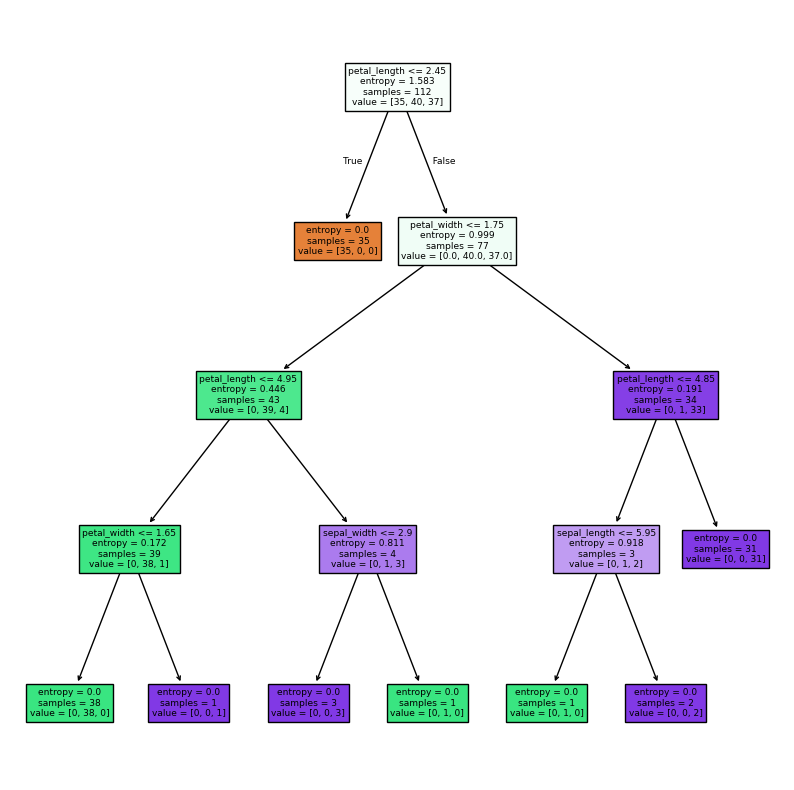

In [33]:
# plot tree로 결정트리가 어떻게 학습했는지를 시각화 가능
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plot_tree(model, filled=True, feature_names=iris.columns[:-1])
plt.show()
                                    # entropy로 바뀜 

In [34]:
# 학습하면서 뭔가를 깨달을때 (얘의경우 첫질문만에 setosa를 분석해냄)
model = DecisionTreeClassifier()
model.fit(X, Y)

DecisionTreeClassifier()

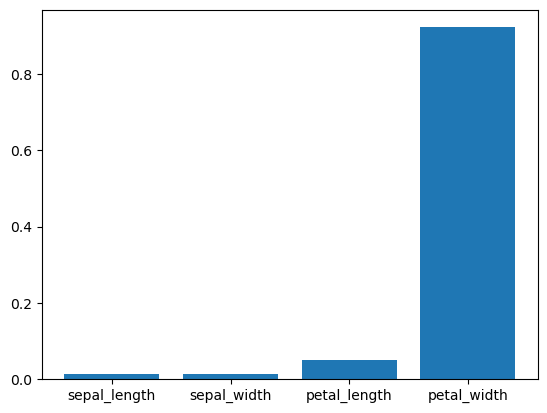

In [35]:
# 언제 지니계수가 확 줄었냐
# 네개 중에서 어떤 특성이 가장 주요하게 작용했는지 평가
A = model.feature_importances_

plt.bar(iris.columns[:-1], A)
plt.show()

# wine.csv 결정트리 예측 모델 만들기

In [37]:
import pandas as pd
wine = pd.read_csv("Data/wine.csv")
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


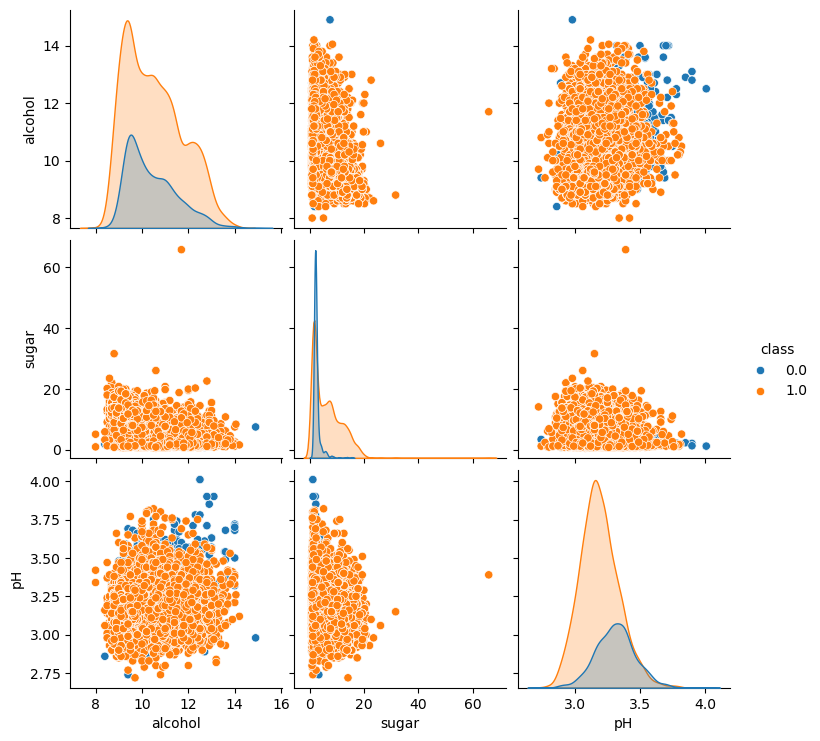

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(wine, hue = "class")

In [55]:
X = wine.drop("class", axis = 1)
Y = wine['class']

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier()
model.fit(train_x, train_y)

print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

# 결정트리 = 데이터 가져와서 분할하고 학습하면 끝

0.9969211822660099
0.8701538461538462


In [57]:
from sklearn.metrics import classification_report
pred = model.predict(test_x)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74       405
         1.0       0.91      0.92      0.91      1220

    accuracy                           0.87      1625
   macro avg       0.83      0.82      0.83      1625
weighted avg       0.87      0.87      0.87      1625



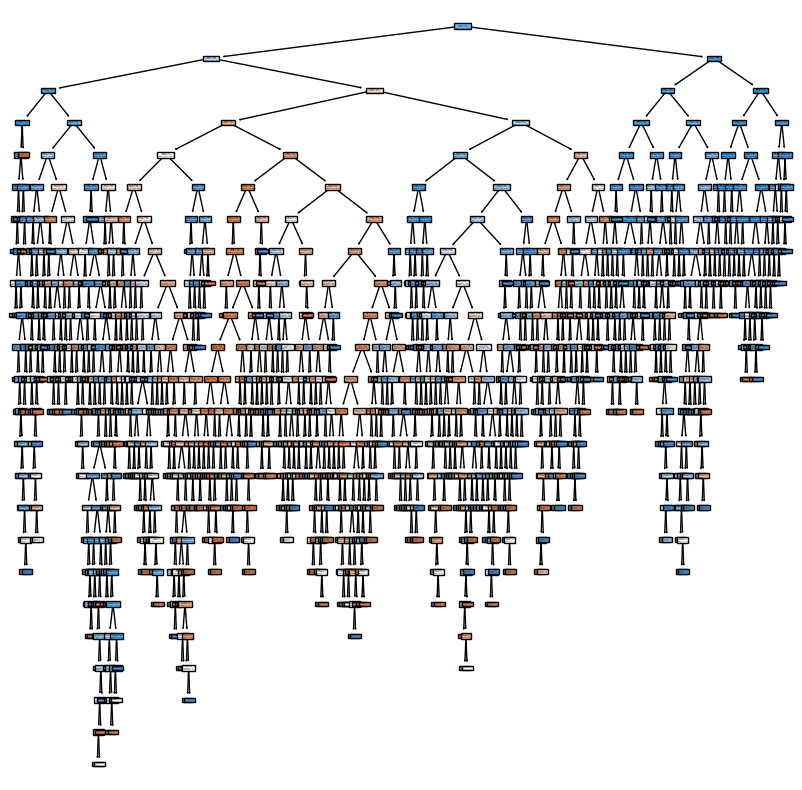

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plot_tree(model, filled=True, feature_names=wine.columns[:-1])
plt.show()

# 못찾는걸 끝까지 찾으려고하면 이딴식으로 나옴. 
# 컴퓨터가 완벽하게 하지 못하게 방해해야함

In [65]:
X = wine.drop("class", axis = 1)
Y = wine['class']

train_x, test_x, train_y, test_y = train_test_split(X, Y)

#model = DecisionTreeClassifier(max_depth = 3)    # max_depth : 층 깊이
#model = DecisionTreeClassifier(min_samples_split = 500)   # min_samples_split : 노드를 분할하기 위한 최소 샘플 수
model = DecisionTreeClassifier(min_samples_leaf = 500)   # min_samples_leaf : 노드가 되기 위한 최소 샘플 수 

model.fit(train_x, train_y)

print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

# 둘다낮으면 과소적합
# 둘다 엄청낮지도,높지도 않게하는 depth 하나씩 넣어보면서 찾기

0.8501642036124795
0.8473846153846154


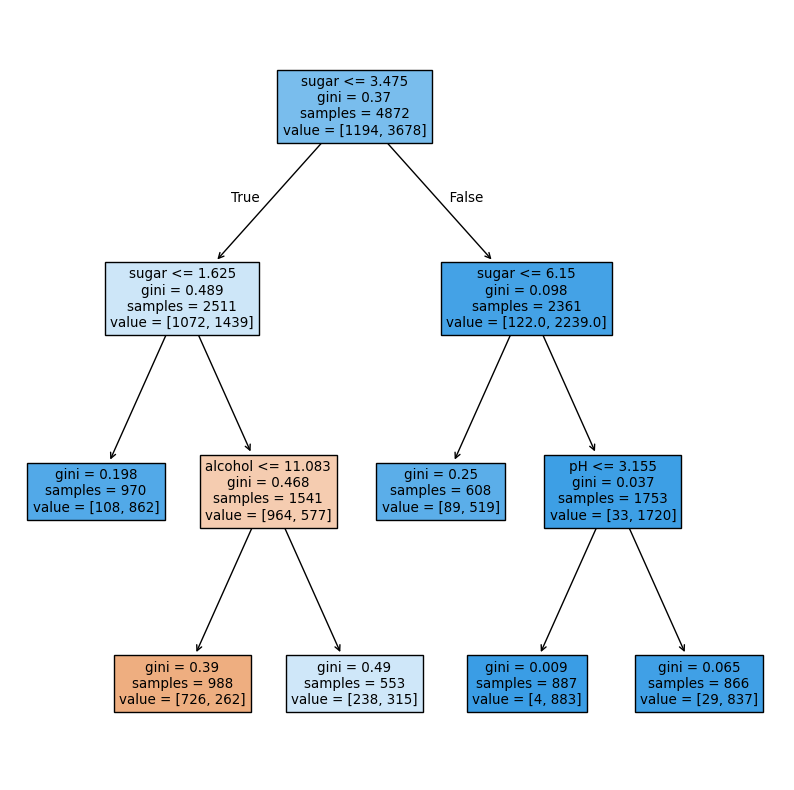

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
plot_tree(model, filled=True, feature_names=wine.columns[:-1])
plt.show()